In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [19]:
for column in train_data.columns:
    if train_data[column].dtype=='object':
        train_data[column].fillna (train_data[column].mode()[0], inplace=True) 
        if column in test_data.columns:
            test_data[column].fillna (test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[features]
y = train_data['SalePrice']

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression() 
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict (X_val)
mae = mean_absolute_error (y_val, y_pred) 
mse = mean_squared_error(y_val, y_pred) 
r2 = r2_score (y_val, y_pred)

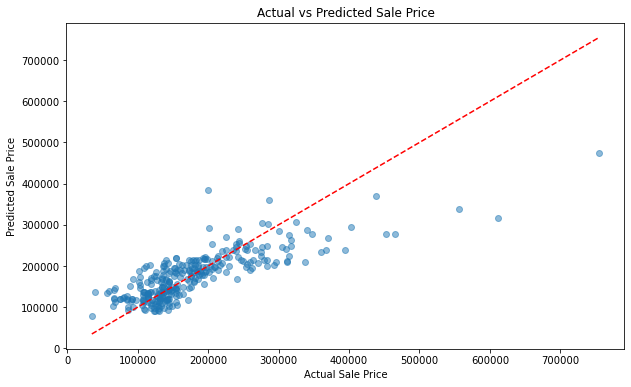

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter (y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


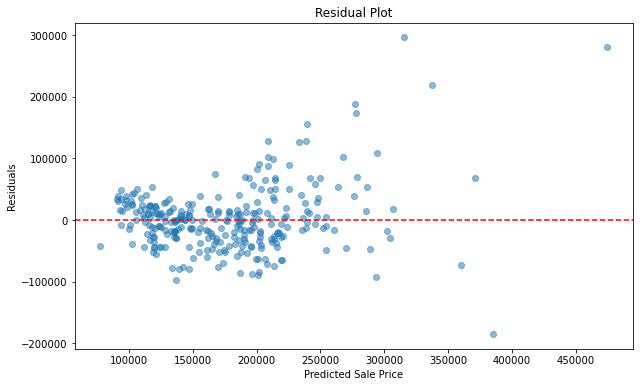

In [36]:


residuals = y_val - y_pred 
plt.figure(figsize=(10, 6))
plt.scatter (y_pred, residuals, alpha=0.5) 
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



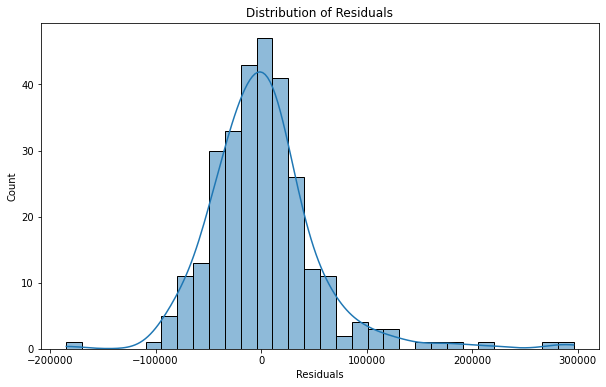

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot (residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()



<Figure size 864x576 with 0 Axes>

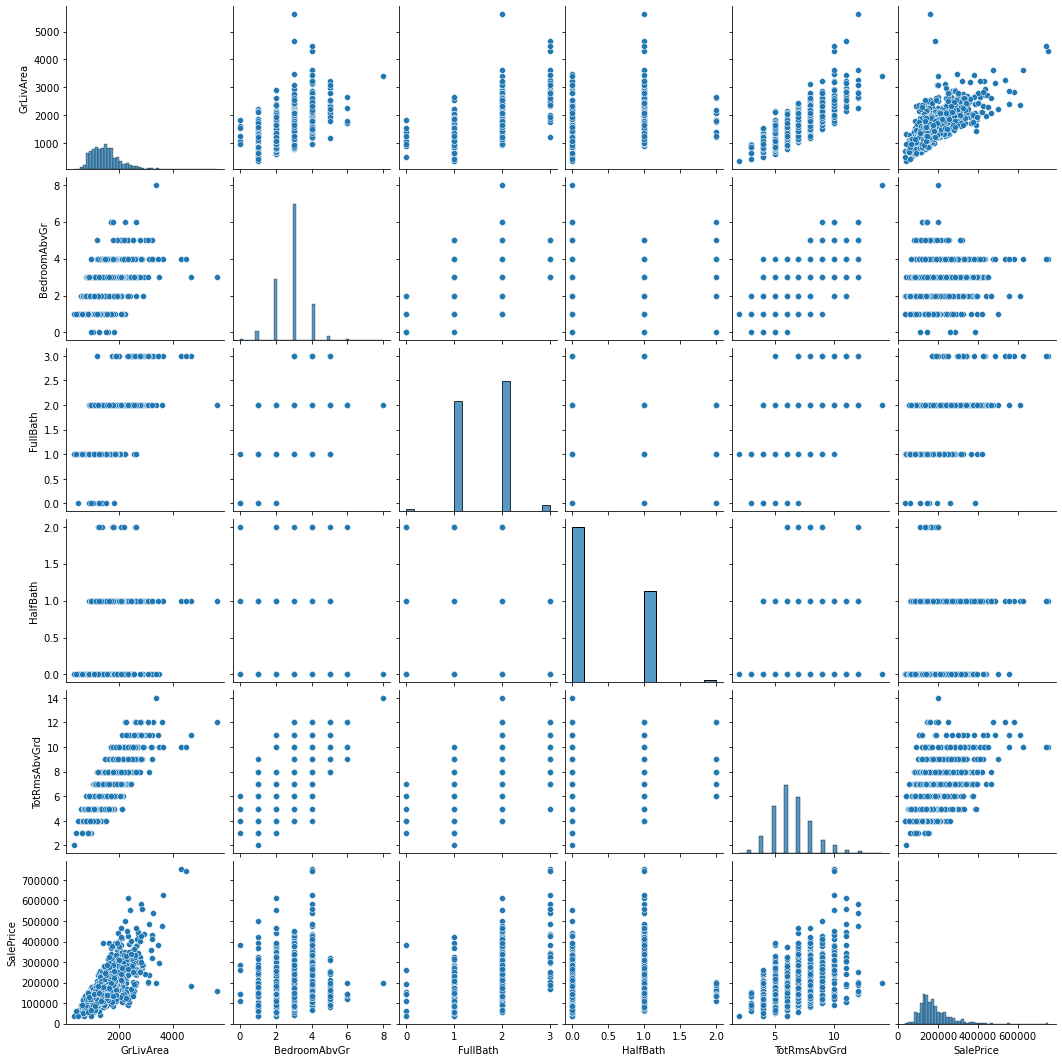

In [34]:


plt.figure(figsize=(12, 8))
sns.pairplot (train_data[features + ['SalePrice']]) 
plt.show()


In [42]:
example = pd.DataFrame({ 
    'GrLivArea': [2000], 
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})

example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = model.predict (X_test)

# Save predictions
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions}) 
submission.to_csv('submission.csv', index=False)


Example Prediction: $240,896.28
